# Flu Shot Learning - Machine Learning final project

### Data Analysis

In [4]:
from pathlib import Path

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# Project data in google drive
#DATA_PATH = Path.cwd()/"drive"/"MyDrive"/"APC"/"data";
# Project data from repository
DATA_PATH = Path.cwd()/".."/"data";

features_train = pd.read_csv(
    DATA_PATH/"training_set_features.csv",
    index_col="respondent_id"
)

labels_train = pd.read_csv(
    DATA_PATH/"training_set_labels.csv",
    index_col="respondent_id"
)

np.testing.assert_array_equal(features_train.index.values, labels_train.index.values)

Taking a general look at the proportion of vaccination, it is possible to see that for the labels `Seasonal Vaccine`, both classes are almost balanced. Such isn't the case for `H1N1 Vaccine`, where approximatly only 20% of people have taken the shot.

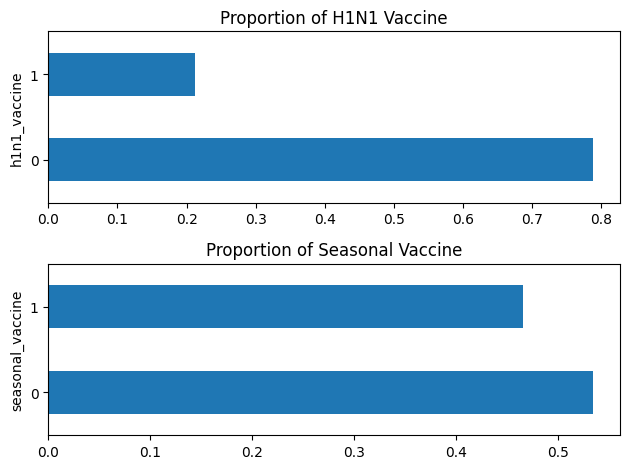

In [5]:
fig, ax = plt.subplots(2, 1, sharex=False)

n_obs = labels_train.shape[0]

(labels_train['h1n1_vaccine']
    .value_counts()
    .div(n_obs)
    .plot.barh(title="Proportion of H1N1 Vaccine", ax=ax[0])
)
ax[0].set_ylabel("h1n1_vaccine")

(labels_train['seasonal_vaccine']
    .value_counts()
    .div(n_obs)
    .plot.barh(title="Proportion of Seasonal Vaccine", ax=ax[1])
)
ax[1].set_ylabel("seasonal_vaccine")

fig.tight_layout()

For seasonal vaccines, the classes are pretty much balenced. But this is not the case for H1N1, where roughly 20% of people got the shot.

In [6]:
print("Correlation: "+ str((labels_train["h1n1_vaccine"]
     .corr(labels_train["seasonal_vaccine"], method="pearson")
)))

pd.crosstab(
    labels_train["h1n1_vaccine"], 
    labels_train["seasonal_vaccine"], 
    margins=True,
    normalize=True
)

Correlation: 0.37714265306144495


seasonal_vaccine,0,1,All
h1n1_vaccine,,,
0,0.497810,0.289737,0.787546
1,0.036582,0.175871,0.212454
All,0.534392,0.465608,1.000000


In [7]:
# Join both features and Labels in one matrix
joined_train = features_train.join(labels_train)
print(joined_train.shape)
joined_train.head()

(26707, 37)


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


#### Plotting several columns:

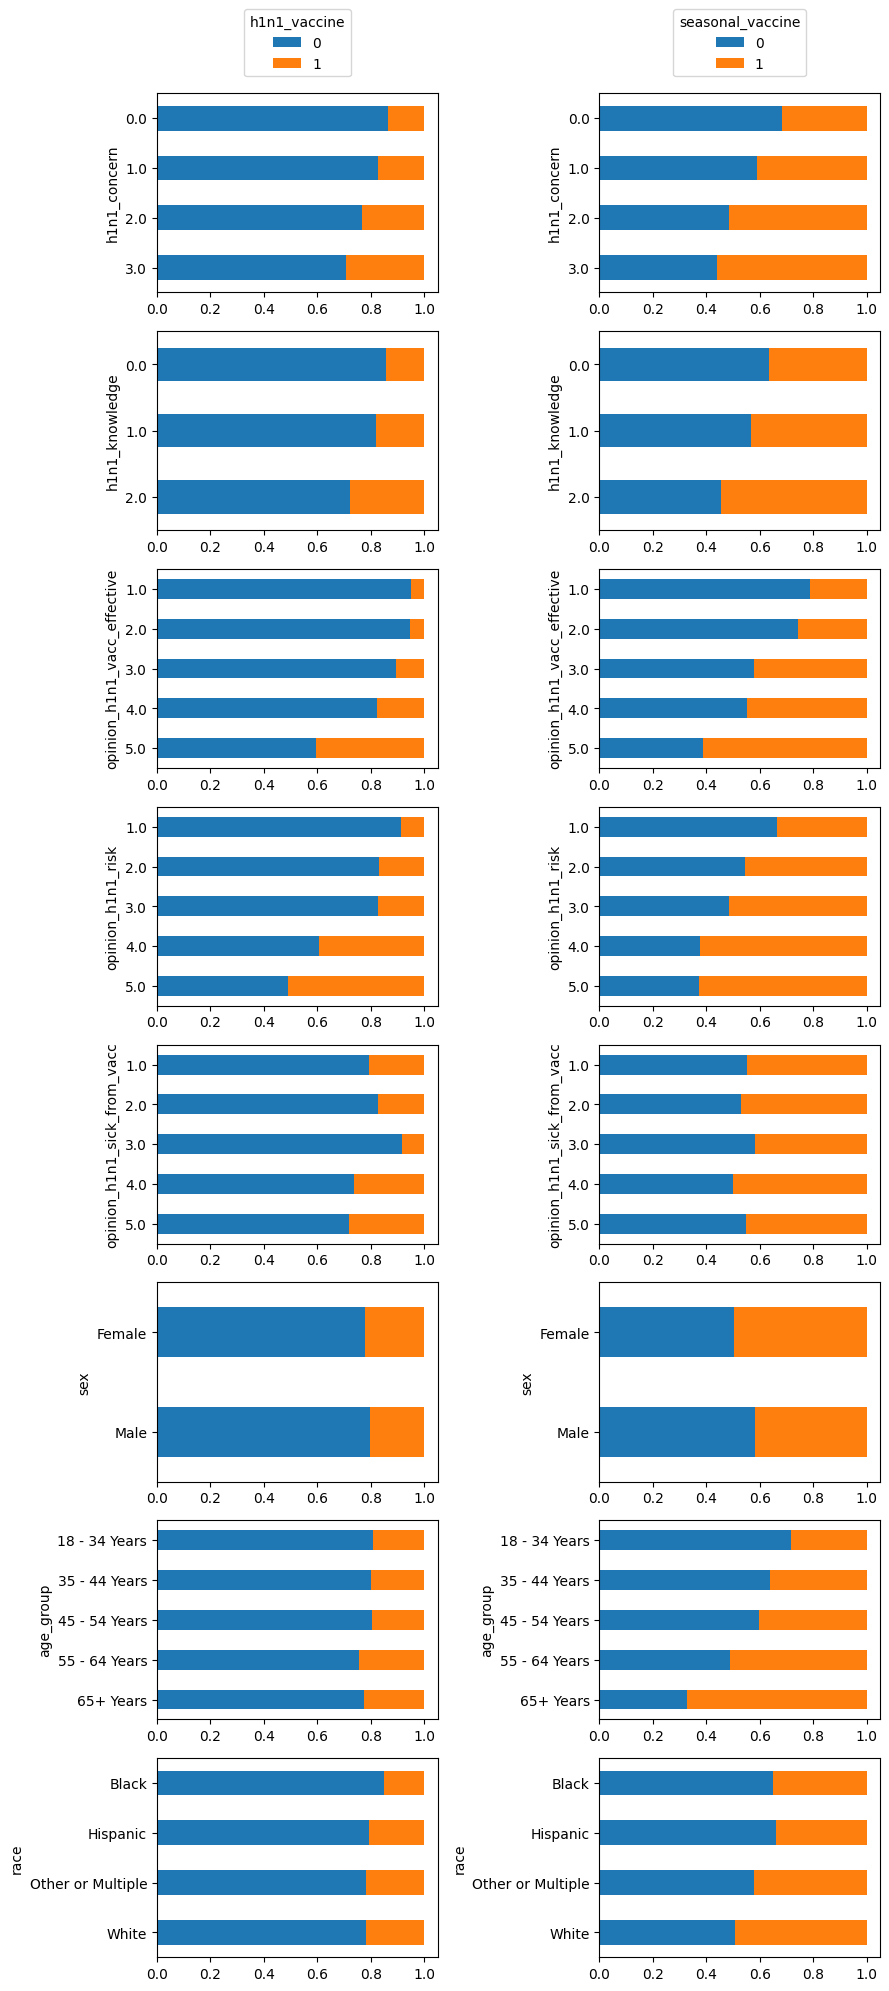

In [8]:
def vaccination_feature_plot(col, target, data, ax : plt.Axes = None):
    """This function will generate a stack bar chart of vaccination rate
    in proportion to a given feature"""
    counts = (joined_train[[target, col]]
                .groupby([target, col])
                .size()
                .unstack(target))
    group_counts = counts.sum(axis='columns')
    props = counts.div(group_counts, axis='index')

    props.plot(kind="barh", stacked=True, ax=ax)
    ax.invert_yaxis()
    ax.legend().remove()

cols= [
    'h1n1_concern', 'h1n1_knowledge', 'opinion_h1n1_vacc_effective',
    'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'sex', 'age_group', 'race'
]

fig, ax = plt.subplots(
    len(cols), 2, figsize =(9, len(cols)*2.5)
)

for i in range(len(cols)):
    vaccination_feature_plot(cols[i], 'h1n1_vaccine', joined_train, ax=ax[i, 0])
    vaccination_feature_plot(cols[i], 'seasonal_vaccine', joined_train, ax=ax[i, 1])

ax[0, 0].legend(loc='lower center', bbox_to_anchor=(0.5, 1.05), title='h1n1_vaccine')
ax[0, 1].legend(loc='lower center', bbox_to_anchor=(0.5, 1.05), title='seasonal_vaccine')
fig.tight_layout()